Image Classification Model By Swarup Chanda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_validation_path='Fruits_Vegetables/validation'

In [3]:
img_width=180
img_height=180

I used this code to load my training image dataset from the specified directory (data_train_path). It shuffles the images, resizes them to (img_width, img_height), and batches them in groups of 32. I didn't apply any validation split.


In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


I created a 10x10 figure to visualize sample images from my training dataset. This code selects one batch, then displays the first 9 images in a 3x3 grid, showing each image with its corresponding label as the title. The axes are turned off for clarity.

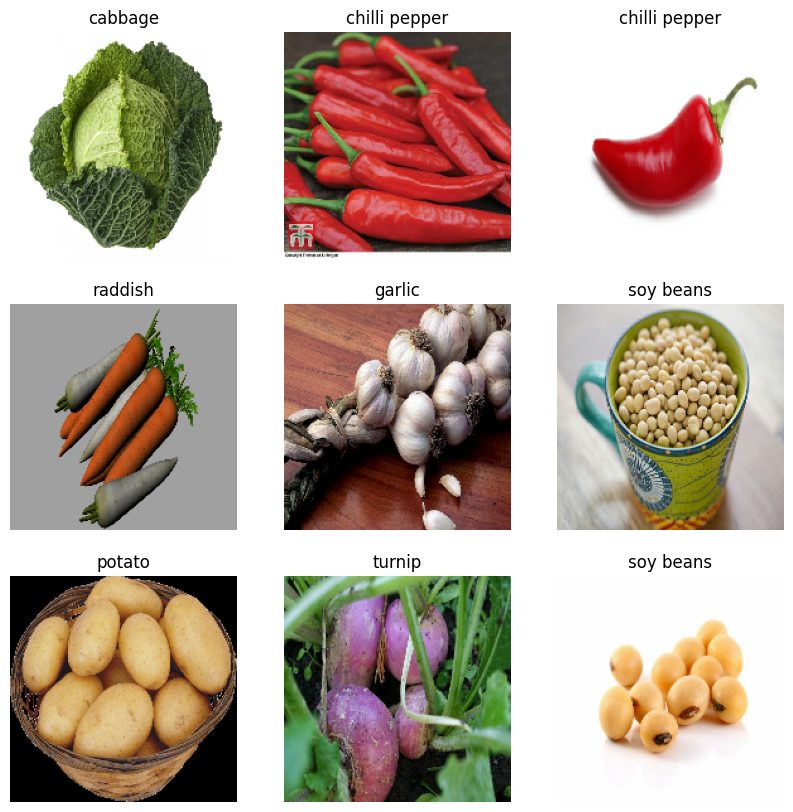

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

I created a Sequential model for image classification:
1.Rescaling input pixel values to a range of [0,1].
2.Using Conv2D layers with ReLU activation for feature extraction.
3.Adding MaxPooling2D layers for downsampling.
4.Flattening the output and applying Dropout regularization.
5.Including Dense layers for classification.

In [12]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

I compiled the model using the Adam optimizer, Sparse Categorical Crossentropy loss function (suitable for integer-encoded labels), and accuracy as the metric for evaluation during training.

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,metrics=['accuracy'])

I trained the model using data_train for training and data_val for validation, for 25 epochs, and stored the training history in history.

In [19]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 295ms/step - accuracy: 0.0473 - loss: 3.7356 - val_accuracy: 0.2023 - val_loss: 2.9491
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - accuracy: 0.1885 - loss: 2.9350 - val_accuracy: 0.4986 - val_loss: 1.8607
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.3907 - loss: 2.1232 - val_accuracy: 0.7236 - val_loss: 1.1361
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.5803 - loss: 1.4827 - val_accuracy: 0.8462 - val_loss: 0.5876
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.7478 - loss: 0.8591 - val_accuracy: 0.9117 - val_loss: 0.3965
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 350ms/step - accuracy: 0.8516 - loss: 0.5304 - val_accuracy: 0.9174 - val_loss: 0.4425
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 349ms/step - accuracy: 0.9035 - loss: 0.3610 - val_accuracy: 0.9316 - val_loss: 0.4953
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.9230 - loss: 0.2981 - val_accu

Text(0.5, 1.0, 'Loss')

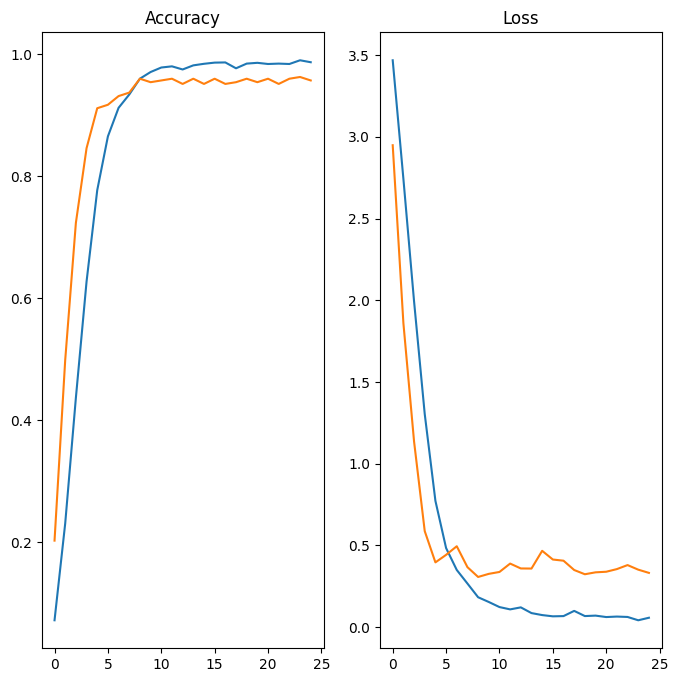

In [23]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')



I loaded and preprocessed the image 'Banana.jpg' using TensorFlow and Keras functions. Firstly, I resized the image to (img_height, img_width) dimensions. Then, I converted it to an array format and expanded its dimensions to prepare for model processing or prediction.

In [41]:
image='Banana.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_data=tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


I calculated the softmax scores for predictions using TensorFlow's tf.nn.softmax function on the predict array, transforming the predictions into probabilities for each class.

In [43]:
score = tf.nn.softmax(predict)

In [44]:
print('The Image is {} with an accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The Image is banana with an accuracy of 81.24


In [46]:
model.save('Image_classifier.keras')